In [1]:
from rdkit import Chem

In [2]:
import urllib
url = "http://www.kegg.jp/dbget-bin/www_bget?-f+m+compound+C00002"
fn = "C00002.mol"
urllib.urlretrieve(url,"{0}".format(fn))

('C00002.mol', <httplib.HTTPMessage instance at 0x10a85cb90>)

In [3]:
with open(fn, 'r') as f:
    print(f.read())

 
 
 
 31 33  0  0  1  0  0  0  0  0999 V2000
   29.4250  -14.6015    0.0000 N   0  0  3  0  0  0  0  0  0  0  0  0
   30.4825  -15.3378    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   28.1393  -15.0165    0.0000 C   0  0  2  0  0  0  0  0  0  0  0  0
   29.9040  -13.2050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   31.7155  -14.4321    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   30.6227  -16.7578    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   26.9999  -14.1633    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   27.7071  -16.2669    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
   31.3532  -13.2108    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   32.9718  -14.9814    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   31.9434  -17.3478    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   25.8897  -14.9580    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
   26.3221  -16.2669    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
   28.5133  -17.4063    0.0000 O   0  0  0  

In [4]:
mol = Chem.MolFromMolFile('C00002.mol')

In [5]:
print mol.GetNumAtoms()

31


In [6]:
print Chem.MolToSmiles(mol)

Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O


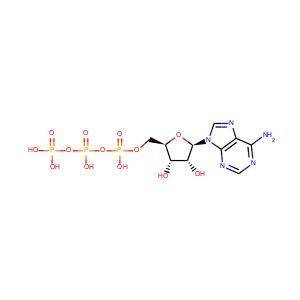

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
#rdDepictor.Compute2DCoords(mol)
Draw.MolToFile(mol, 'mol.png')
from IPython.display import Image
Image(filename="mol.png")

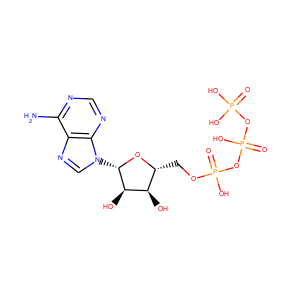

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
rdDepictor.Compute2DCoords(mol)
Draw.MolToFile(mol, 'mol.png')
from IPython.display import Image
Image(filename="mol.png")

In [9]:
kegids =["C00002", "C00003", "C00004", "C00005", "C00006", "C00007", "C00008", "C00009", "C00010"]

In [10]:
for id in kegids:
   url = "http://www.kegg.jp/dbget-bin/www_bget?-f+m+compound+{0}".format(id)
   fn = "{0}.mol".format(id)
   urllib.urlretrieve(url,"{0}".format(fn))

In [11]:
mols = [Chem.MolFromMolFile("{0}.mol".format(id)) for id in kegids]

In [12]:
for mol in mols:
    print "{0}\t{1}".format(mol.GetNumAtoms(), Chem.MolToSmiles(mol))

31	Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O
44	NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1
44	NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1
48	NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1
48	NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1
2	O=O
27	Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O
5	O=P(O)(O)O
48	CC(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(O)C(=O)NCCC(=O)NCCS


In [13]:
for i in range(len(mols)):
    id = kegids[i]
    mol = mols[i]
    print "{0}\t{1}\t{2}".format(id, mol.GetNumAtoms(), Chem.MolToSmiles(mol))

C00002	31	Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O
C00003	44	NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1
C00004	44	NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)C=CC1
C00005	48	NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1
C00006	48	NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1
C00007	2	O=O
C00008	27	Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O
C00009	5	O=P(O)(O)O
C00010	48	CC(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(O)C(=O)NCCC(=O)NCCS


C00002


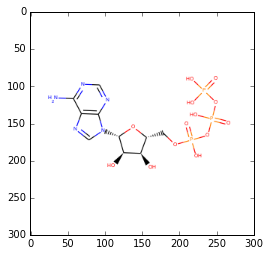

C00003


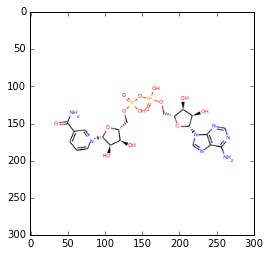

C00004


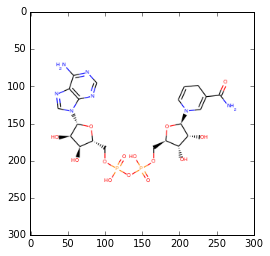

C00005


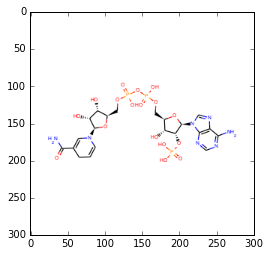

C00006


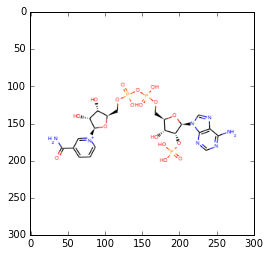

C00007


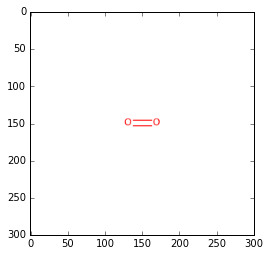

C00008


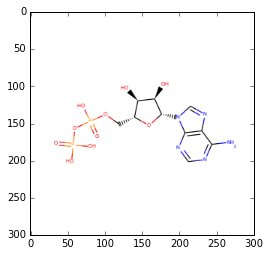

C00009


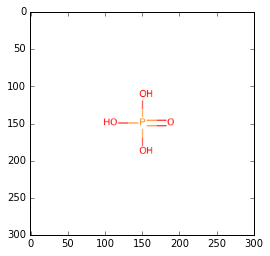

C00010


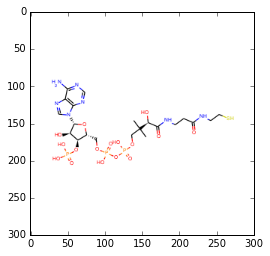

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
for i in range(len(mols)):
    id = kegids[i]
    mol = mols[i]
    rdDepictor.Compute2DCoords(mol)
    Draw.MolToFile(mol, "{0}.png".format(id))
    im = Image.open("{0}.png".format(id))
    im_list = np.asarray(im)
    print id
    plt.imshow(im_list)
    plt.show()

In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Cluster import Murtagh
from rdkit.ML.Cluster import ClusterVis

In [16]:
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,3) for mol in mols]

In [17]:
nPts = len(fps)
dists = []
for i in xrange(1,nPts):
    for j in xrange(i):
        dist = 1 - DataStructs.TanimotoSimilarity(fps[i],fps[j])
        dists.append(dist)

In [18]:
acts = []
cnt = 0
for mol in mols:
    acts.append(cnt)
    cnt += 1

In [19]:
clutTree = Murtagh.ClusterData(dists,nPts,1,isDistData=1)[0]
for pt in clutTree.GetPoints():
    idx = pt.GetIndex()-1
    pt.SetName(kegids[idx])
    pt.SetData(acts[idx])
clutTree.Print(showData=1,level=0)

Cluster(17)	 Metric: 0.878562
  Cluster(15)	 Metric: 0.380211
    Cluster(12)	 Metric: 0.097345
      C00003	 Data: 1.000000	 Metric: 0.000000
      C00006	 Data: 4.000000	 Metric: 0.000000
    Cluster(14)	 Metric: 0.356114
      C00010	 Data: 8.000000	 Metric: 0.000000
      Cluster(13)	 Metric: 0.335155
        Cluster(10)	 Metric: 0.047297
          C00002	 Data: 0.000000	 Metric: 0.000000
          C00008	 Data: 6.000000	 Metric: 0.000000
        Cluster(11)	 Metric: 0.091743
          C00004	 Data: 2.000000	 Metric: 0.000000
          C00005	 Data: 3.000000	 Metric: 0.000000
  Cluster(16)	 Metric: 0.428571
    C00007	 Data: 5.000000	 Metric: 0.000000
    C00009	 Data: 7.000000	 Metric: 0.000000


In [20]:
ClusterVis.ClusterToImg(clutTree,"cluster.png",showIndices=1,size=(1000,500))

<rdkit.sping.PIL.pidPIL.PILCanvas instance at 0x111638cb0>

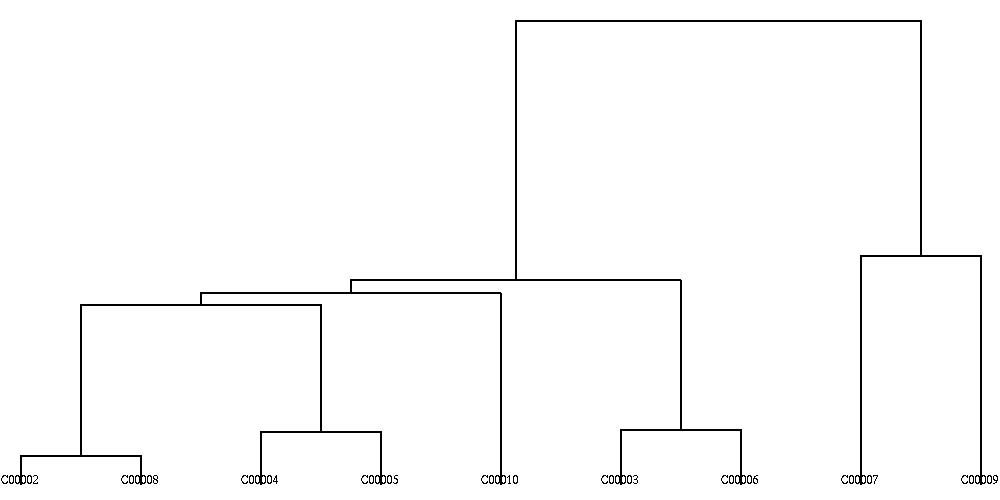

In [21]:
from IPython.display import Image
Image(filename="cluster.png")

In [22]:
np_fps = []
for fp in fps:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_fps.append(arr)

In [23]:
np_fps

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  1.,  0., ...,  0.,  0.,  0.])]

In [24]:
for i in range(len(np_fps)):
    for j in range(len(np_fps)):
        if i < j:
            bunsi = 0.
            bunbo = 0.
            for k in range(len(np_fps[i])):
                if np_fps[i][k] == 1 and np_fps[j][k] == 1:
                    bunsi += 1.
                if np_fps[i][k] == 1 or np_fps[j][k] == 1:
                    bunbo += 1.
            print (kegids[i], kegids[j], bunsi, bunbo, bunsi / bunbo)

('C00002', 'C00003', 66.0, 104.0, 0.6346153846153846)
('C00002', 'C00004', 66.0, 100.0, 0.66)
('C00002', 'C00005', 62.0, 114.0, 0.543859649122807)
('C00002', 'C00006', 60.0, 118.0, 0.5084745762711864)
('C00002', 'C00007', 1.0, 73.0, 0.0136986301369863)
('C00002', 'C00008', 67.0, 74.0, 0.9054054054054054)
('C00002', 'C00009', 5.0, 73.0, 0.0684931506849315)
('C00002', 'C00010', 59.0, 125.0, 0.472)
('C00003', 'C00004', 71.0, 121.0, 0.5867768595041323)
('C00003', 'C00005', 66.0, 136.0, 0.4852941176470588)
('C00003', 'C00006', 91.0, 113.0, 0.8053097345132744)
('C00003', 'C00007', 1.0, 99.0, 0.010101010101010102)
('C00003', 'C00008', 64.0, 103.0, 0.6213592233009708)
('C00003', 'C00009', 5.0, 99.0, 0.050505050505050504)
('C00003', 'C00010', 60.0, 150.0, 0.4)
('C00004', 'C00005', 89.0, 109.0, 0.8165137614678899)
('C00004', 'C00006', 64.0, 136.0, 0.47058823529411764)
('C00004', 'C00007', 1.0, 95.0, 0.010526315789473684)
('C00004', 'C00008', 64.0, 99.0, 0.6464646464646465)
('C00004', 'C00009', 5